# 階層ベイズモデル
### 目的
***
- 階層ベイズモデルの理解

### 参考文献
***
- [データ解析のための統計モデリング入門-一般化線形モデル・階層ベイズモデル・MCMC-](http://hosho.ees.hokudai.ac.jp/~kubo/ce/IwanamiBook.html)
- [Pythonで実装しながら緑本を学ぶ (第10章 階層ベイズモデル)](https://ohke.hateblo.jp/entry/2018/03/21/230000)

In [5]:
import theano
import requests
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt

### データセット

In [6]:
response = requests.get('http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/hbm/data7a.csv')
with open ('data7a.csv', 'wb') as f:
    f.write(response.content)
    f.close()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
y,0,2,7,8,1,7,8,8,1,1,...,6,2,8,6,6,1,0,4,7,0


count    100.000000
mean       4.030000
std        3.150934
min        0.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        8.000000
Name: y, dtype: float64

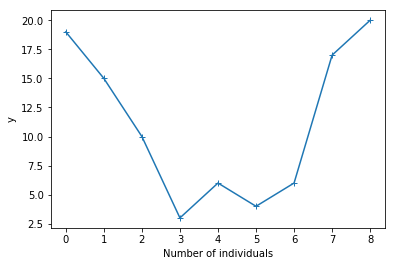

In [7]:
data = pd.read_csv('data7a.csv')
display(data.T)
display(data['y'].describe())
plt.plot(data['y'].value_counts().sort_index(), marker='+')
plt.xlabel('Number of individuals')
plt.ylabel('y')
plt.show()

In [8]:
with pm.Model() as model:
    beta = pm.Normal('beta', mu=0, sd=100) # βの事前分布をN(0, 100)の正規分布で設定(無情報事前分布)
    s = pm.Uniform('s', lower=0, upper=10000) # 超パラメータsの(超)事前分布をU(0, 10000)の連続一様分布で設定(無情報事前分布)
    r = pm.Normal('r', mu=0, sd=s, shape=len(data.y)) # パラメータrの事前分布をN(0, s)の正規分布で設定(階層事前分布)
    y = pm.Binomial('y', n=8, p=pm.invlogit(beta + r), observed=data.y.values) # ロジットリンク関数を設定し、二項分布で推定する

In [ ]:
# TODO 事後分布の可視化とWAIC,WBICによる結果評価